In [8]:
#Author: Michael Elgin (melgin@uwyo.edu)
#2023_10_31

#Notebook for Hyperparameter Optimization

In [9]:
#Modules

#Python 3.11.2
import numpy as np #1.26.0
import pandas as pd #1.5.3
from sklearn.model_selection import train_test_split #1.3.0
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt #3.7.0

In [10]:
#All regression algorithms will use the white wine dataset.
#Classification will use both colors.
df_red = pd.read_csv("data/winequality-red.csv", sep=";")
df_white = pd.read_csv("data/winequality-white.csv", sep=";")
df_all = pd.concat([df_white, df_red], ignore_index=True)

features_red = df_red.iloc[:, :-1]
features_white = df_white.iloc[:, :-1]
features_all = df_all.iloc[:, :-1]
target_red = df_red['quality']
target_white = df_white['quality']
target_all = df_all['quality']

In [11]:
#Model 1 - Decision Tree

from sklearn.tree import DecisionTreeRegressor

#Hyperparams - exponential grid-search
hp_list_max_depth_exponents = [i for i in range(0,7)]
hp_list_max_depth = [2**i for i in hp_list_max_depth_exponents]

hp_list_min_samples_split_exponents = [i for i in range(1, 15)]
hp_list_min_samples_split = [2**i for i in hp_list_min_samples_split_exponents]

parameters = {
    'max_depth' : hp_list_max_depth,
    'min_samples_split' : hp_list_min_samples_split,
}

In [12]:
#Training (takes about 5 seconds)
DTR_model = DecisionTreeRegressor(random_state=0)
GS = GridSearchCV(DTR_model, parameters, scoring='neg_mean_absolute_percentage_error')
GS.fit(features_white.to_numpy(), target_white.to_numpy())

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 4, 8, 16, 32, 64],
                         'min_samples_split': [2, 4, 8, 16, 32, 64, 128, 256,
                                               512, 1024, 2048, 4096, 8192,
                                               16384]},
             scoring='neg_mean_absolute_percentage_error')

Best hyperparams overall:
{'max_depth': 4, 'min_samples_split': 2048}


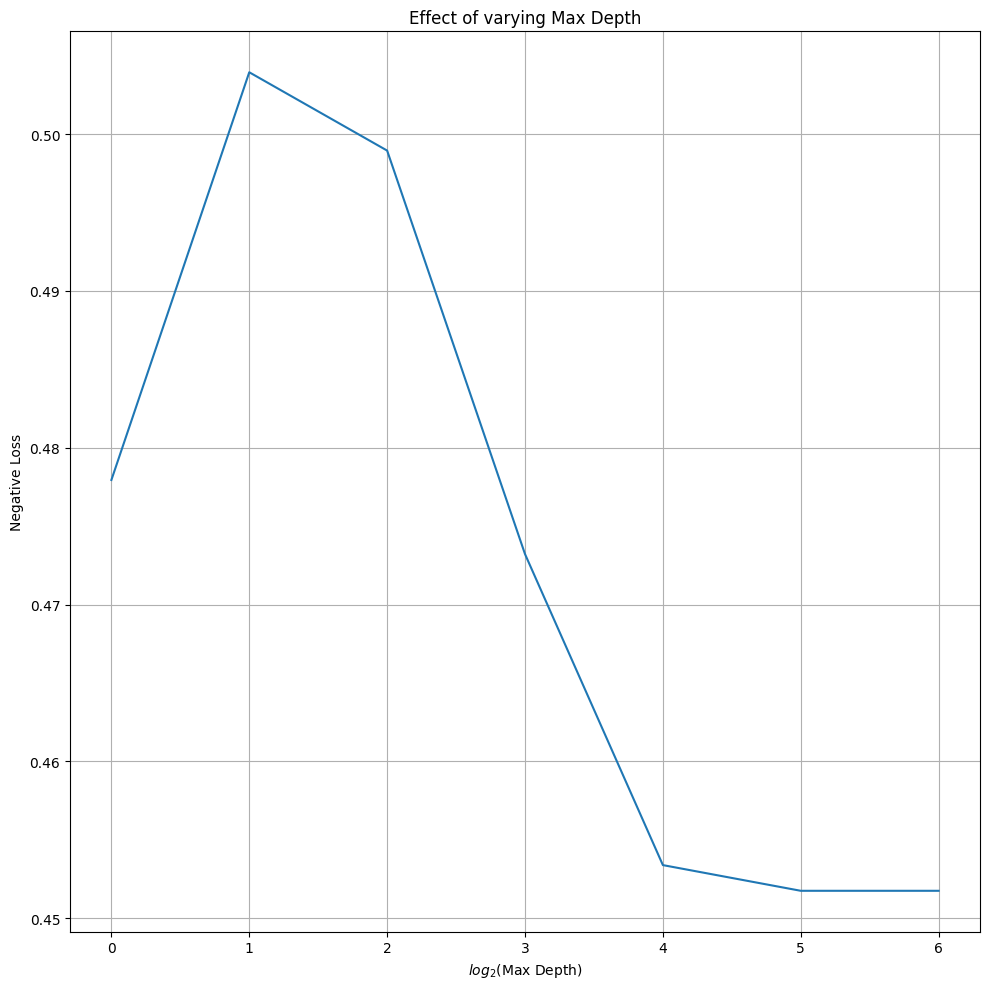

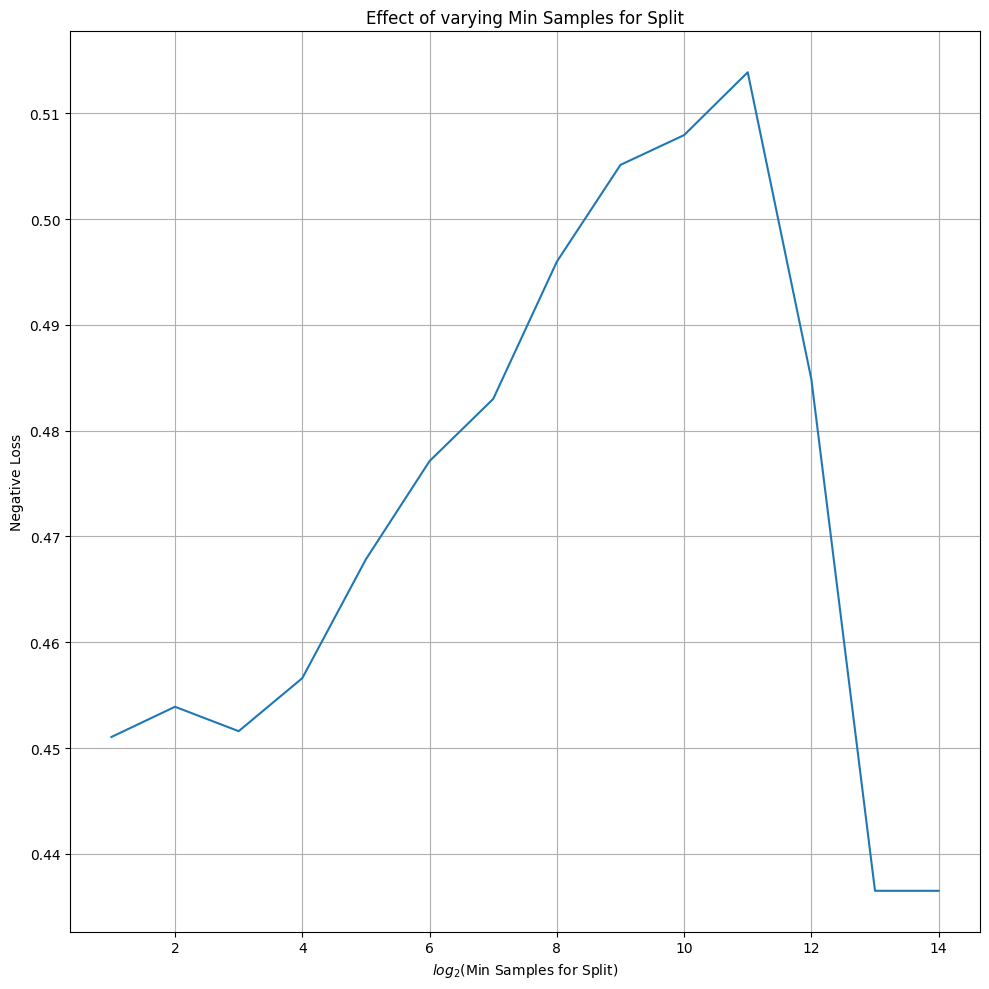

In [41]:
#Now to plot how the hyperparams change the model performance (on average)

#First to get lists of what params were used at each run
cv_max_depth = GS.cv_results_['param_max_depth']
cv_min_samples_split = GS.cv_results_['param_min_samples_split']

#And the score obtained at that run
performances = GS.cv_results_['mean_test_score']

#Now to loop thru, for every candidate find which runs it was a part of, and take the average of those performances
for hyperparam_list, exponents, cv_results, name in [(hp_list_max_depth, hp_list_max_depth_exponents, cv_max_depth, "Max Depth"), 
                                         (hp_list_min_samples_split, hp_list_min_samples_split_exponents, cv_min_samples_split, "Min Samples for Split")]:
    avgs = []
    for candidate in hyperparam_list:
        indexes = np.where(cv_results == candidate)[0]
        hyperparam_performances = [performances[index] for index in indexes]
        avg = sum(hyperparam_performances)/len(hyperparam_performances)
        avgs.append(avg)

    plt.figure(figsize=(10,10))
    plt.plot(exponents, avgs)
    plt.title("Effect of varying " + name)
    plt.xlabel("$log_2$(" + name + ")")
    plt.ylabel("Negative Loss")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("graphs/decision_tree_regressor/" + name)

print("Best hyperparams overall:")
print(GS.best_params_)

In [14]:
#Model 2 - Random Forest
from sklearn.ensemble import RandomForestRegressor

#Hyperparams - exponential grid-search
hp_list_n_estimators_exponents = [i for i in range(0,7)]
hp_list_n_estimators = [2**i for i in hp_list_n_estimators_exponents]

hp_list_max_depth_exponents = [i for i in range(0,4)]
hp_list_max_depth = [2**i for i in hp_list_max_depth_exponents]

hp_list_min_samples_split_exponents = [i for i in range(1, 4)]
hp_list_min_samples_split = [2**i for i in hp_list_min_samples_split_exponents]

parameters = {
    'n_estimators' : hp_list_n_estimators,
    'max_depth' : hp_list_max_depth,
    'min_samples_split' : hp_list_min_samples_split,
}

In [15]:
#Training (takes about 50 seconds)
RFR_model = RandomForestRegressor(random_state=0)
GS = GridSearchCV(RFR_model, parameters, scoring='neg_mean_absolute_percentage_error')
GS.fit(features_white.to_numpy(), target_white.to_numpy())

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 4, 8],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [1, 2, 4, 8, 16, 32, 64]},
             scoring='neg_mean_absolute_percentage_error')

Best hyperparams overall:
{'max_depth': 8, 'min_samples_split': 8, 'n_estimators': 64}


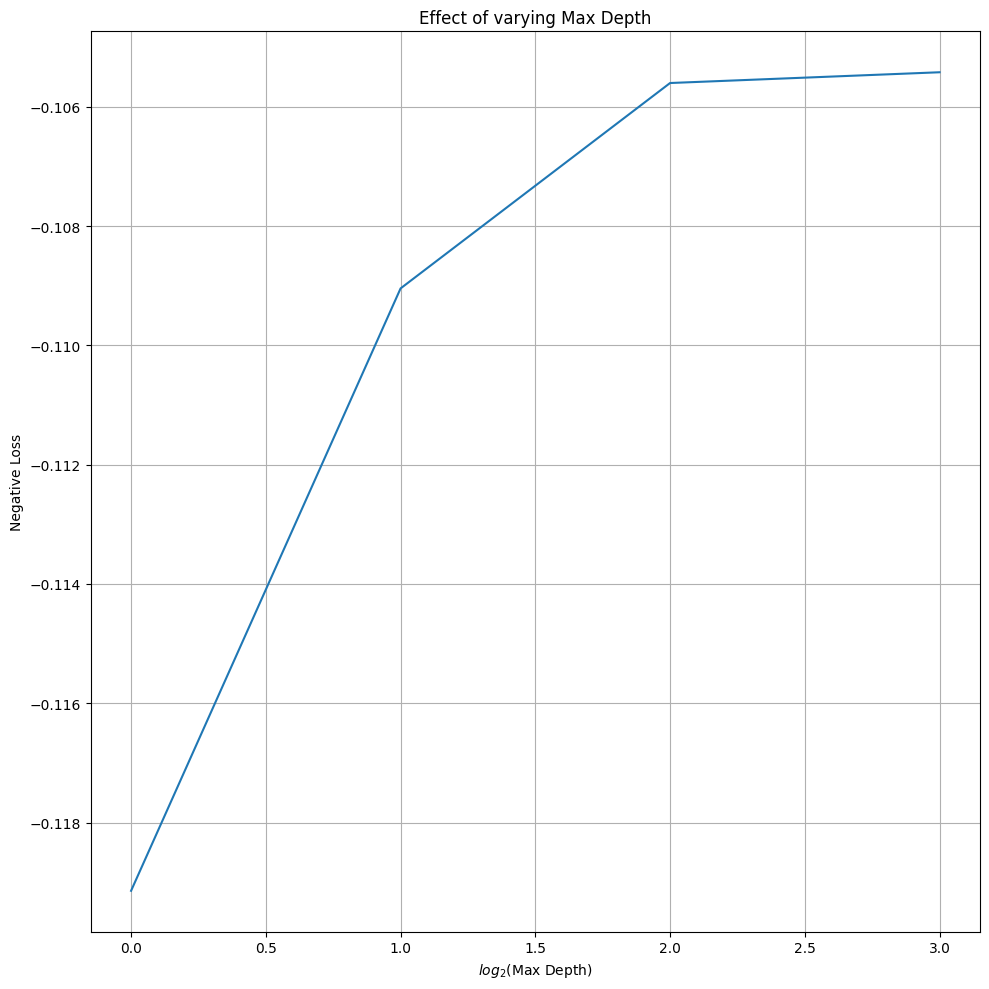

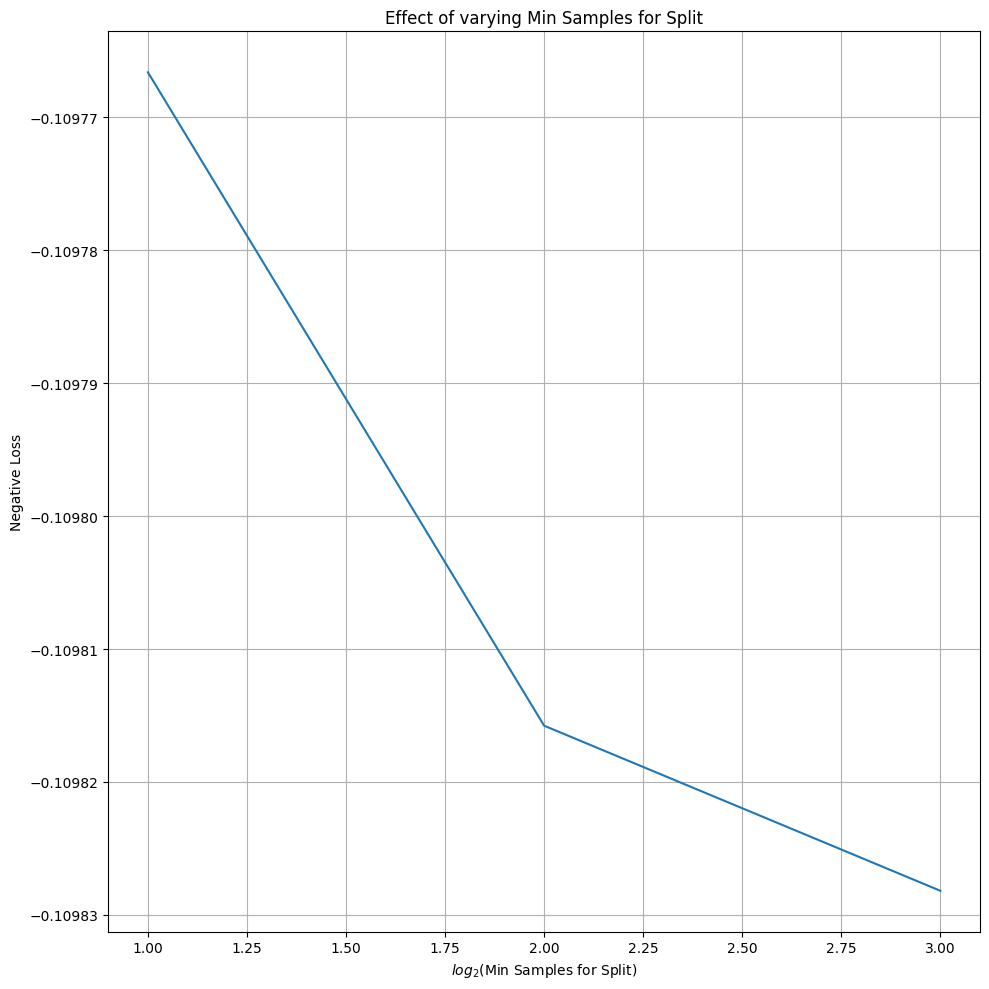

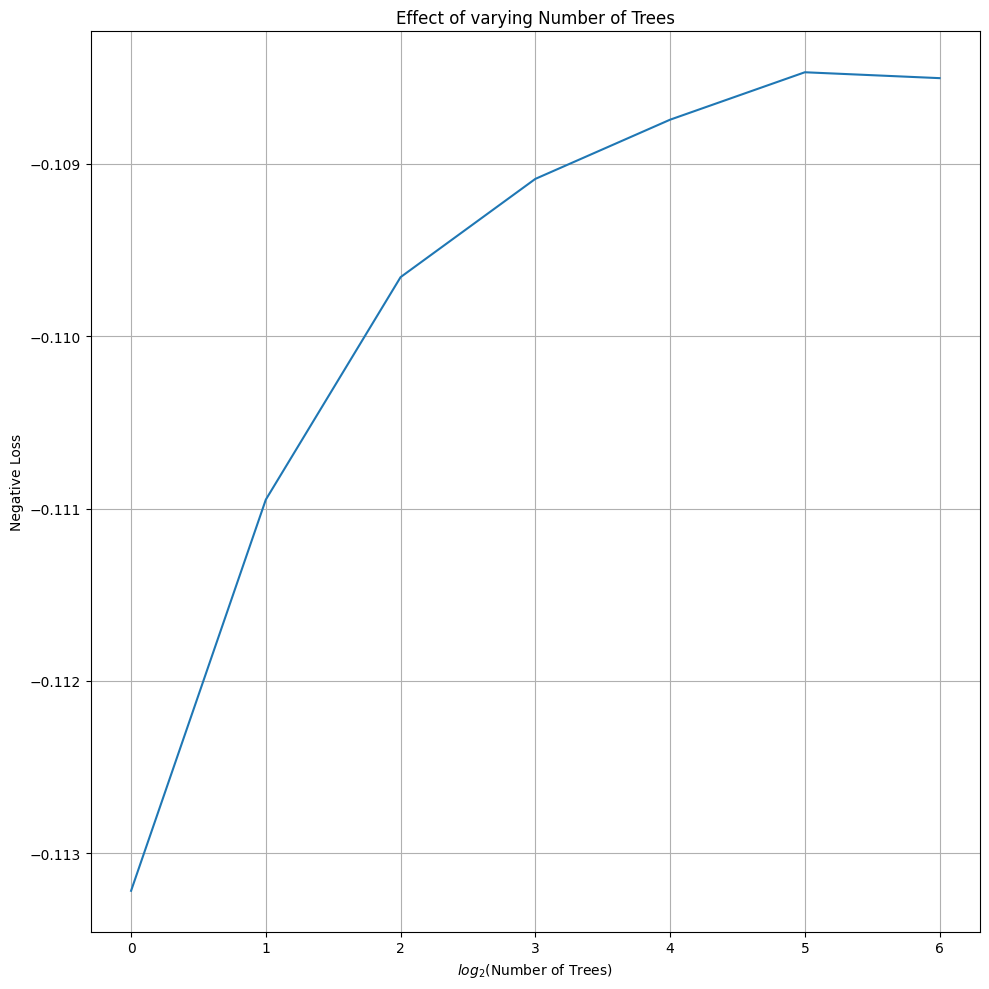

In [16]:
#Now to plot how the hyperparams change the model performance (on average)

#First to get lists of what params were used at each run
cv_n_estimators = GS.cv_results_['param_n_estimators']
cv_max_depth = GS.cv_results_['param_max_depth']
cv_min_samples_split = GS.cv_results_['param_min_samples_split']

#And the score obtained at that run
performances = GS.cv_results_['mean_test_score']

#Now to loop thru, for every candidate find which runs it was a part of, and take the average of those performances
for hyperparam_list, exponents, cv_results, name in [(hp_list_max_depth, hp_list_max_depth_exponents, cv_max_depth, "Max Depth"), 
                                         (hp_list_min_samples_split, hp_list_min_samples_split_exponents, cv_min_samples_split, "Min Samples for Split"),
                                         (hp_list_n_estimators, hp_list_n_estimators_exponents, cv_n_estimators, "Number of Trees")]:
    avgs = []
    for candidate in hyperparam_list:
        indexes = np.where(cv_results == candidate)[0]
        hyperparam_performances = [performances[index] for index in indexes]
        avg = sum(hyperparam_performances)/len(hyperparam_performances)
        avgs.append(avg)

    plt.figure(figsize=(10,10))
    plt.plot(exponents, avgs)
    plt.title("Effect of varying " + name)
    plt.xlabel("$log_2$(" + name + ")")
    plt.ylabel("Negative Loss")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("graphs/random_forest/" + name)

print("Best hyperparams overall:")
print(GS.best_params_)

In [17]:
#Part 2 - HPO for classification

In [18]:
#Model 1 - Support Vector Classifier
from sklearn.svm import SVC

#Hyperparams - exponential grid-search, also some categorical choices for hyperparams
hp_list_C_exponents = [i for i in range(0,2)] #Ideally many more C-values would be tested, but it makes runtime really long
hp_list_C = [2**i for i in hp_list_C_exponents]

hp_list_kernel = ['poly', 'rbf']

parameters = {
    'C': hp_list_C,
    'kernel' : hp_list_kernel,
}

In [20]:
#Training (takes about 40 seconds)
SVC_model = SVC(random_state=0)
GS = GridSearchCV(SVC_model, parameters, scoring='accuracy')
GS.fit(features_all.to_numpy(), target_all.to_numpy())

GridSearchCV(estimator=SVC(random_state=0),
             param_grid={'C': [1, 2], 'kernel': ['poly', 'rbf']},
             scoring='accuracy')

Best hyperparams overall:
{'C': 1, 'kernel': 'poly'}


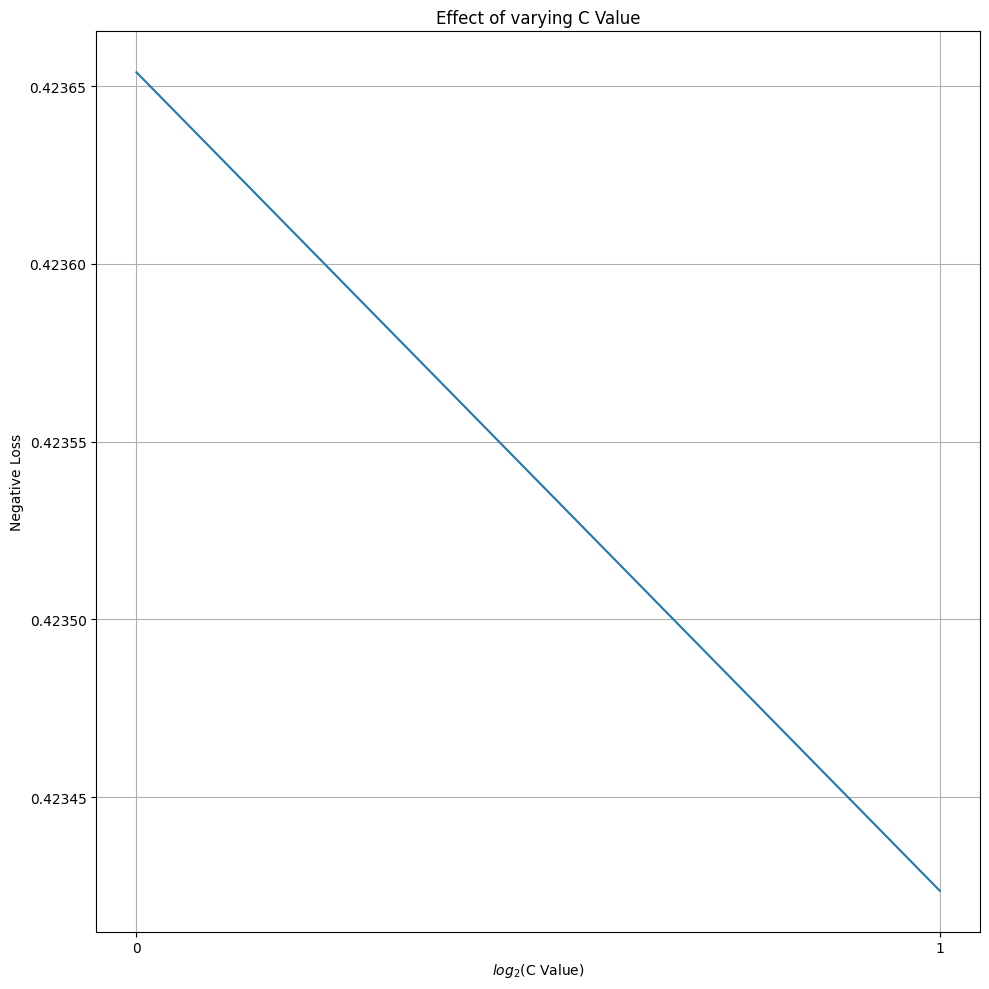

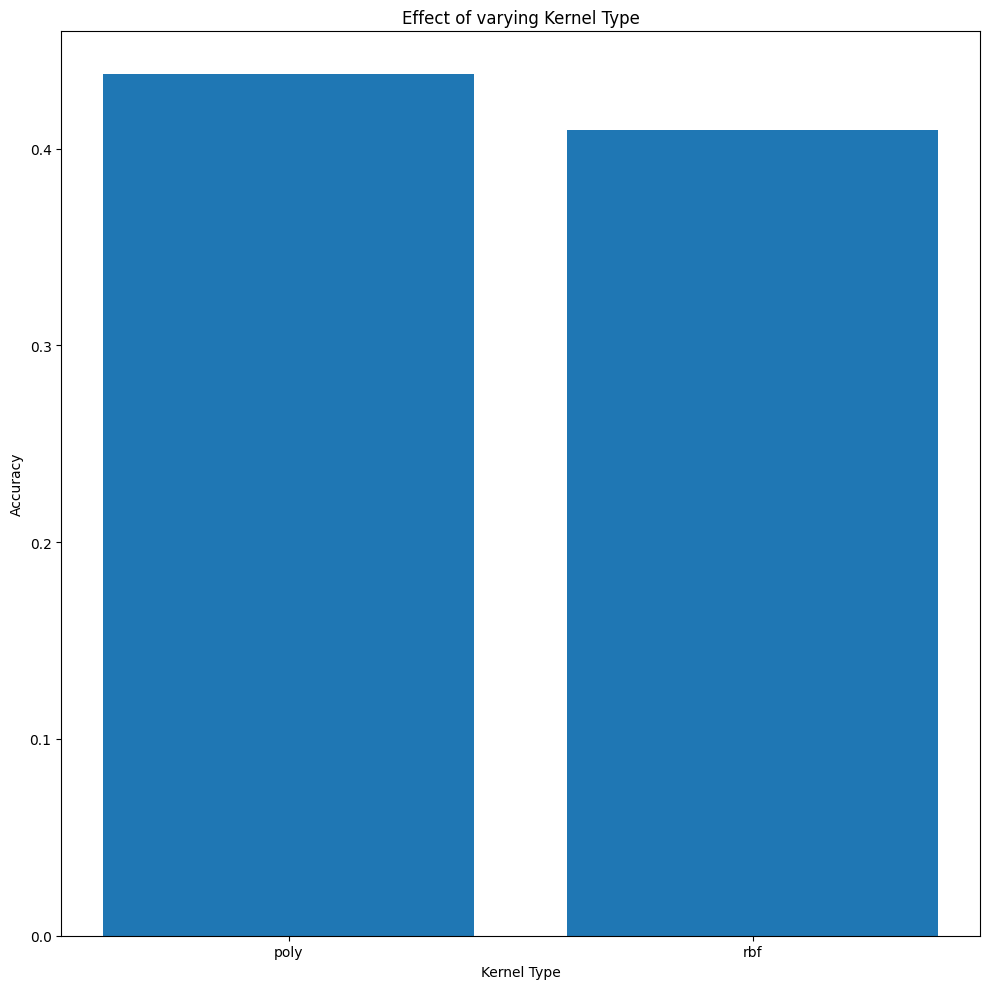

In [23]:
#Now to plot how the hyperparams change the model performance (on average)

#First to get lists of what params were used at each run
cv_C = GS.cv_results_['param_C']
cv_kernel = GS.cv_results_['param_kernel']

#And the score obtained at that run
performances = GS.cv_results_['mean_test_score']

#Now to loop thru, for every candidate find which runs it was a part of, and take the average of those performances
for hyperparam_list, exponents, cv_results, name in [(hp_list_C, hp_list_C_exponents, cv_C, "C Value"),
                                                    (hp_list_kernel, None, cv_kernel, "Kernel Type"),]:
    avgs = []
    for candidate in hyperparam_list:
        indexes = np.where(cv_results == candidate)[0]
        hyperparam_performances = [performances[index] for index in indexes]
        avg = sum(hyperparam_performances)/len(hyperparam_performances)
        avgs.append(avg)

    if exponents != None:
        plt.figure(figsize=(10,10))
        plt.plot(exponents, avgs)
        plt.title("Effect of varying " + name)
        plt.xlabel("$log_2$(" + name + ")")
        plt.ylabel("Negative Loss")
        plt.xticks(exponents)
        plt.grid(True)
        plt.tight_layout()
        plt.savefig("graphs/SVC/" + name)
    else: #categorical hyperparam
        plt.figure(figsize=(10,10))
        plt.bar(hyperparam_list, avgs)
        plt.title("Effect of varying " + name)
        plt.xlabel(name)
        plt.ylabel("Accuracy")
        plt.tight_layout()
        plt.savefig("graphs/SVC/" + name)

print("Best hyperparams overall:")
print(GS.best_params_)

In [33]:
#Model 2 - Logistic regression
from sklearn.linear_model import LogisticRegression

#Hyperparams - exponential grid-search, also some categorical choices for hyperparams
hp_list_C_exponents = [i for i in range(0,8)]
hp_list_C = [2**i for i in hp_list_C_exponents]

hp_list_penalty = ['l1', 'l2'] #Note that for these, not all solvers are compatible. liblinear is one that is compatible

parameters = {
    'C': hp_list_C,
    'penalty' : hp_list_penalty,
}

In [34]:
#Training (takes about 40 seconds)
log_reg_model = LogisticRegression(random_state=0, solver='liblinear')
GS = GridSearchCV(log_reg_model, parameters, scoring='accuracy')
GS.fit(features_all.to_numpy(), target_all.to_numpy())

GridSearchCV(estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid={'C': [1, 2, 4, 8, 16, 32, 64, 128],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

Best hyperparams overall:
{'C': 128, 'penalty': 'l2'}


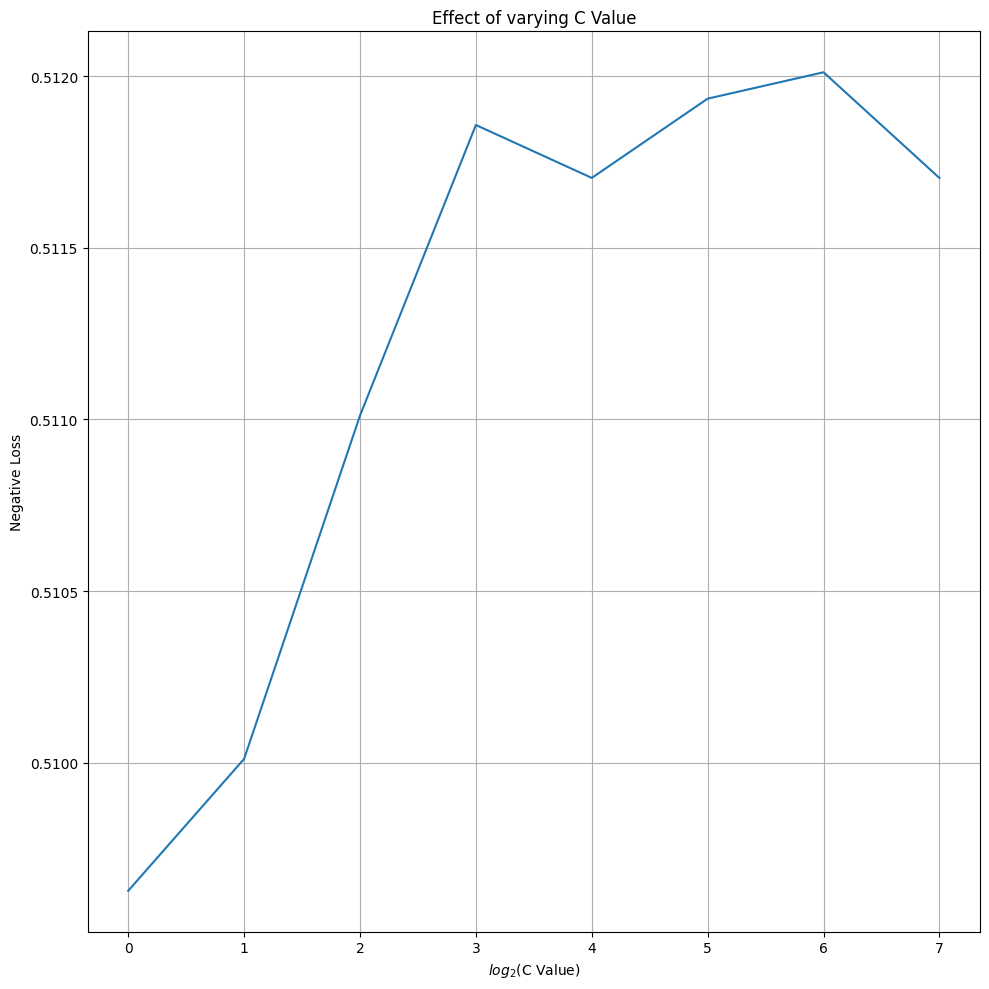

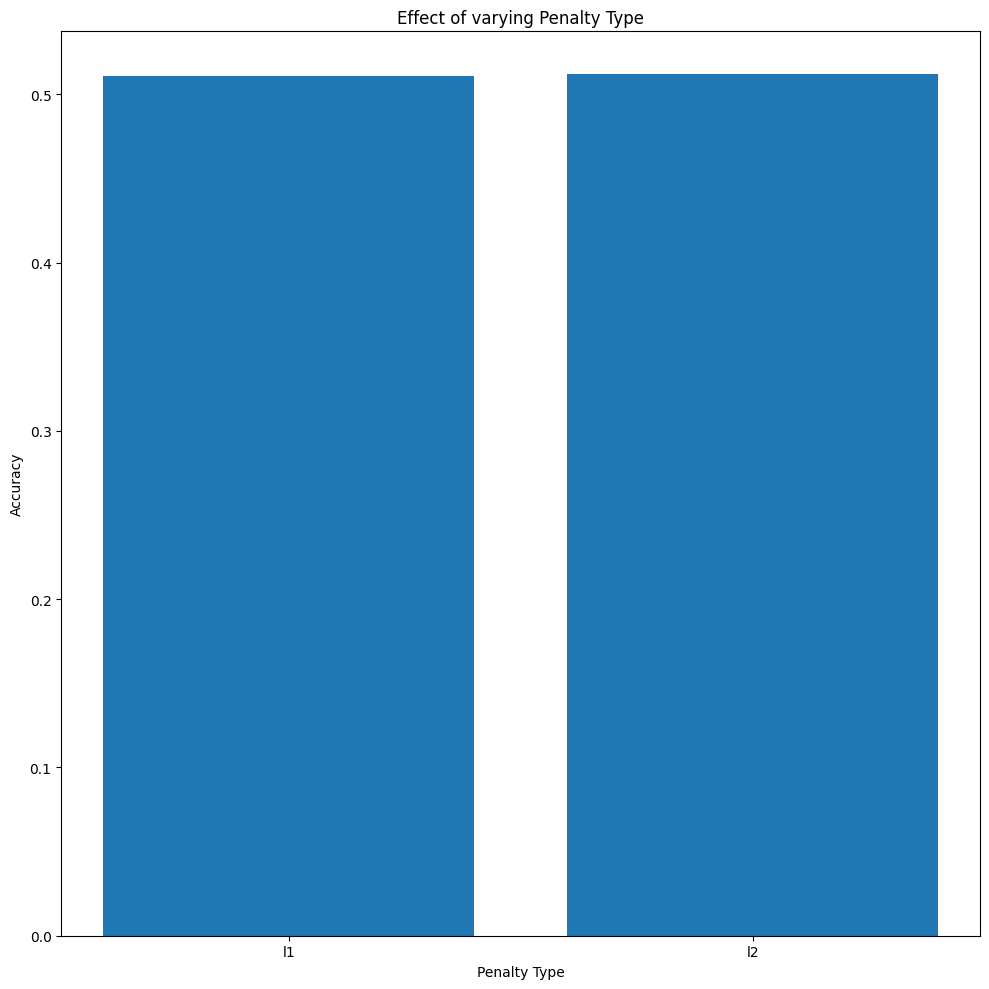

In [35]:
#Now to plot how the hyperparams change the model performance (on average)

#First to get lists of what params were used at each run
cv_C = GS.cv_results_['param_C']
cv_penalty = GS.cv_results_['param_penalty']

#And the score obtained at that run
performances = GS.cv_results_['mean_test_score']

file_path = "graphs/logistic_regression/"

#Now to loop thru, for every candidate find which runs it was a part of, and take the average of those performances
for hyperparam_list, exponents, cv_results, name in [(hp_list_C, hp_list_C_exponents, cv_C, "C Value"),
                                                    (hp_list_penalty, None, cv_penalty, "Penalty Type"),]:
    avgs = []
    for candidate in hyperparam_list:
        indexes = np.where(cv_results == candidate)[0]
        hyperparam_performances = [performances[index] for index in indexes]
        avg = sum(hyperparam_performances)/len(hyperparam_performances)
        avgs.append(avg)

    if exponents != None:
        plt.figure(figsize=(10,10))
        plt.plot(exponents, avgs)
        plt.title("Effect of varying " + name)
        plt.xlabel("$log_2$(" + name + ")")
        plt.ylabel("Negative Loss")
        plt.xticks(exponents)
        plt.grid(True)
        plt.tight_layout()
    else: #categorical hyperparam
        plt.figure(figsize=(10,10))
        plt.bar(hyperparam_list, avgs)
        plt.title("Effect of varying " + name)
        plt.xlabel(name)
        plt.ylabel("Accuracy")
        plt.tight_layout()
    plt.savefig(file_path + name)

print("Best hyperparams overall:")
print(GS.best_params_)

In [37]:
#Model 3 - Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

#Hyperparams - exponential grid-search - similar to DecisionTreeRegressor from before
hp_list_max_depth_exponents = [i for i in range(0,7)]
hp_list_max_depth = [2**i for i in hp_list_max_depth_exponents]

hp_list_min_samples_split_exponents = [i for i in range(1, 15)]
hp_list_min_samples_split = [2**i for i in hp_list_min_samples_split_exponents]

parameters = {
    'max_depth' : hp_list_max_depth,
    'min_samples_split' : hp_list_min_samples_split,
}

In [38]:
#Training (takes about 8 seconds)
DTC = DecisionTreeClassifier(random_state=0)
GS = GridSearchCV(DTC, parameters, scoring='accuracy')
GS.fit(features_all.to_numpy(), target_all.to_numpy())

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 4, 8, 16, 32, 64],
                         'min_samples_split': [2, 4, 8, 16, 32, 64, 128, 256,
                                               512, 1024, 2048, 4096, 8192,
                                               16384]},
             scoring='accuracy')

Best hyperparams overall:
{'max_depth': 4, 'min_samples_split': 2048}


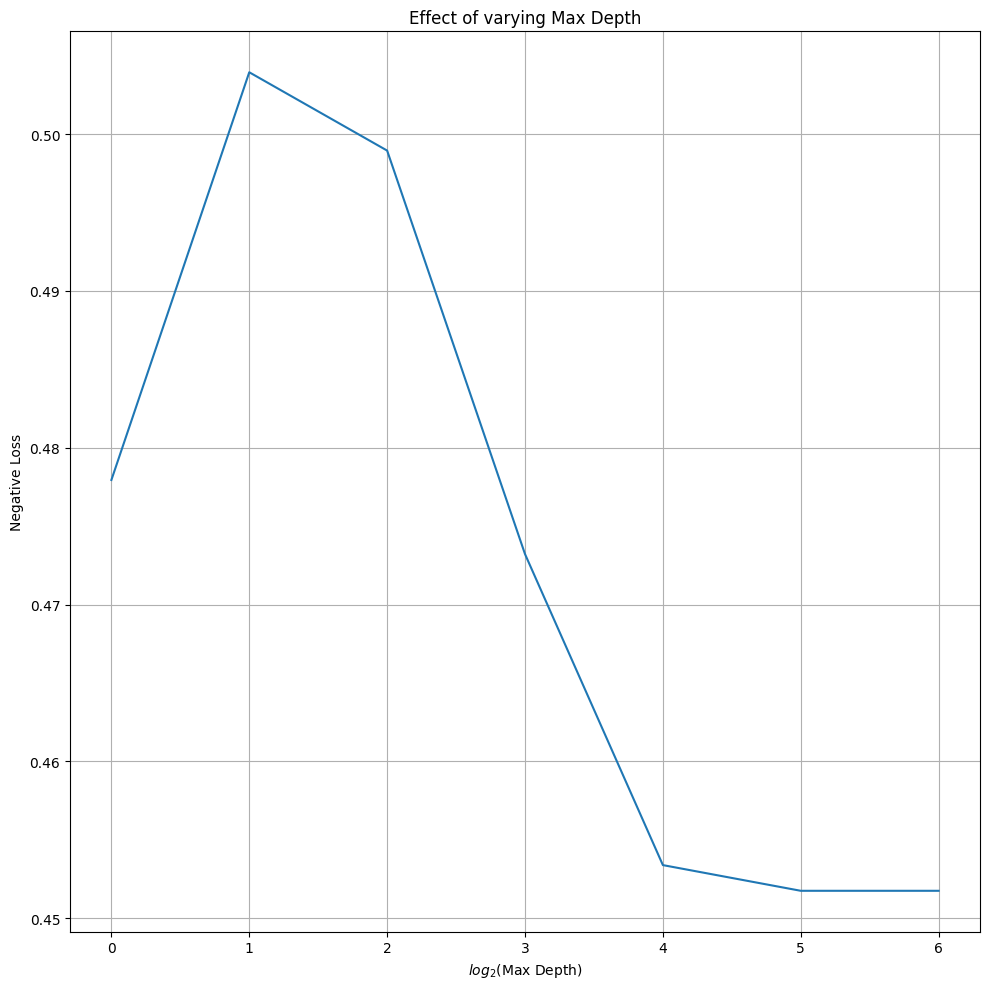

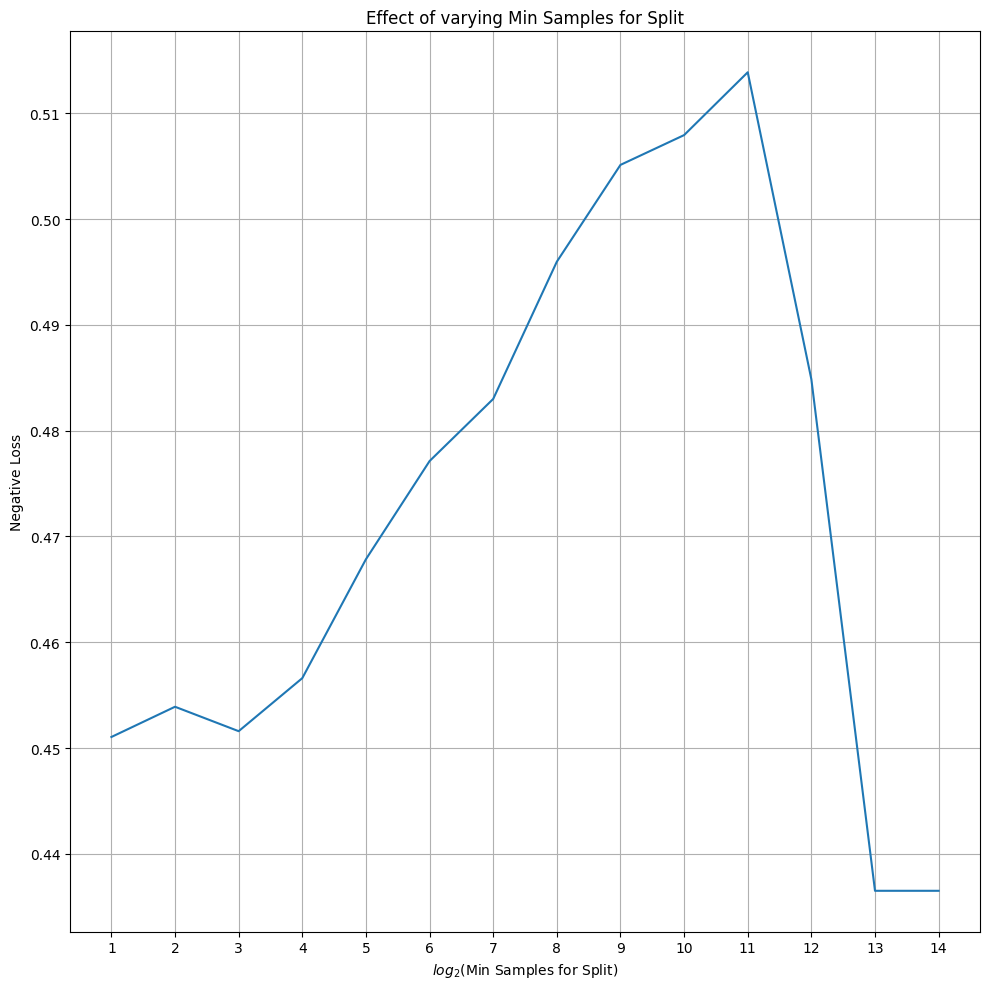

In [40]:
#Now to plot how the hyperparams change the model performance (on average)

#First to get lists of what params were used at each run
cv_max_depth = GS.cv_results_['param_max_depth']
cv_min_samples_split = GS.cv_results_['param_min_samples_split']

#And the score obtained at that run
performances = GS.cv_results_['mean_test_score']

file_path = "graphs/decision_tree_classifier/"

#Now to loop thru, for every candidate find which runs it was a part of, and take the average of those performances
for hyperparam_list, exponents, cv_results, name in [(hp_list_max_depth, hp_list_max_depth_exponents, cv_max_depth, "Max Depth"),
                                                    (hp_list_min_samples_split, hp_list_min_samples_split_exponents, cv_min_samples_split, "Min Samples for Split"),]:
    avgs = []
    for candidate in hyperparam_list:
        indexes = np.where(cv_results == candidate)[0]
        hyperparam_performances = [performances[index] for index in indexes]
        avg = sum(hyperparam_performances)/len(hyperparam_performances)
        avgs.append(avg)

    if exponents != None:
        plt.figure(figsize=(10,10))
        plt.plot(exponents, avgs)
        plt.title("Effect of varying " + name)
        plt.xlabel("$log_2$(" + name + ")")
        plt.ylabel("Negative Loss")
        plt.xticks(exponents)
        plt.grid(True)
        plt.tight_layout()
    else: #categorical hyperparam
        plt.figure(figsize=(10,10))
        plt.bar(hyperparam_list, avgs)
        plt.title("Effect of varying " + name)
        plt.xlabel(name)
        plt.ylabel("Accuracy")
        plt.tight_layout()
    plt.savefig(file_path + name)

print("Best hyperparams overall:")
print(GS.best_params_)

In [46]:
#Model 4 - K-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier

#Hyperparams - exponential grid-search
hp_list_n_neighbors_exponents = [i for i in range(0,7)]
hp_list_n_neighbors = [2**i for i in hp_list_n_neighbors_exponents]

hp_list_metric = ['l1', 'l2']

parameters = {
    'n_neighbors' : hp_list_n_neighbors,
    'metric' : hp_list_metric,
}

In [47]:
#Training (takes about 2 seconds)
KNN = KNeighborsClassifier()
GS = GridSearchCV(KNN, parameters, scoring='accuracy')
GS.fit(features_all.to_numpy(), target_all.to_numpy())

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['l1', 'l2'],
                         'n_neighbors': [1, 2, 4, 8, 16, 32, 64]},
             scoring='accuracy')

Best hyperparams overall:
{'metric': 'l1', 'n_neighbors': 32}


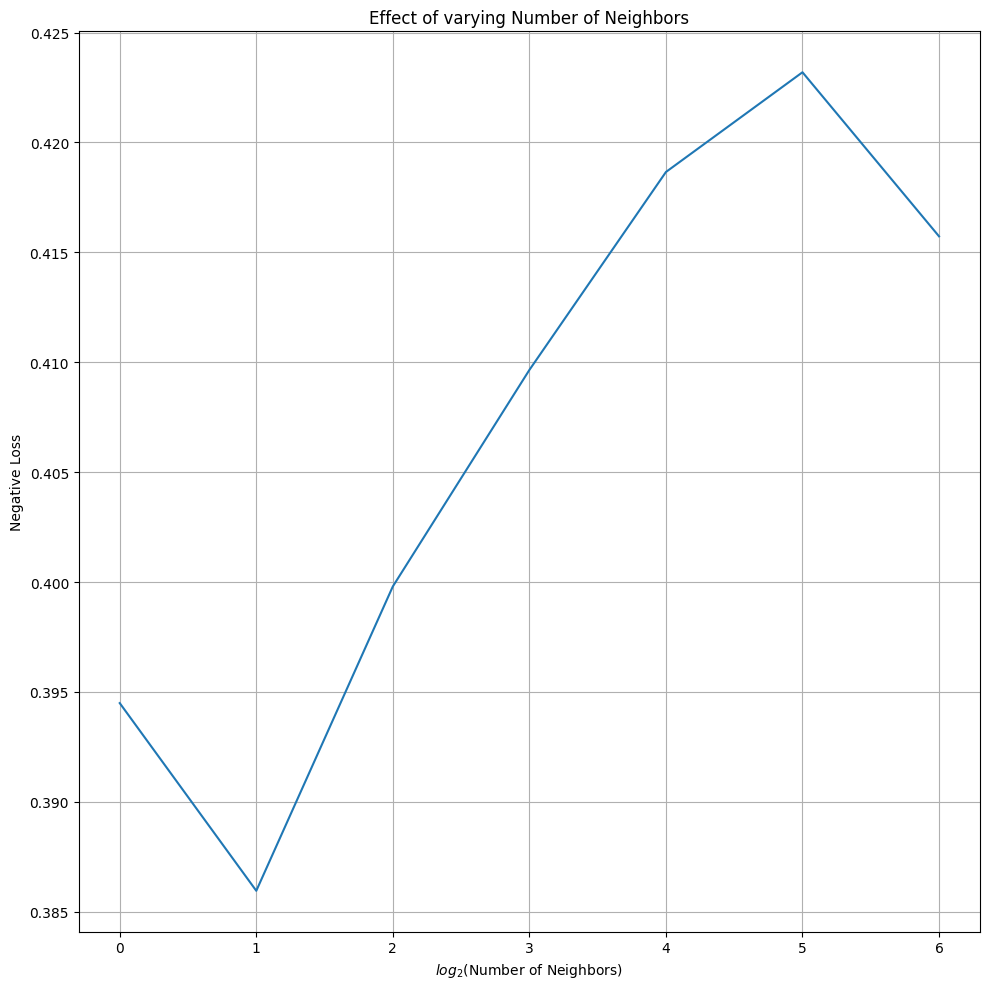

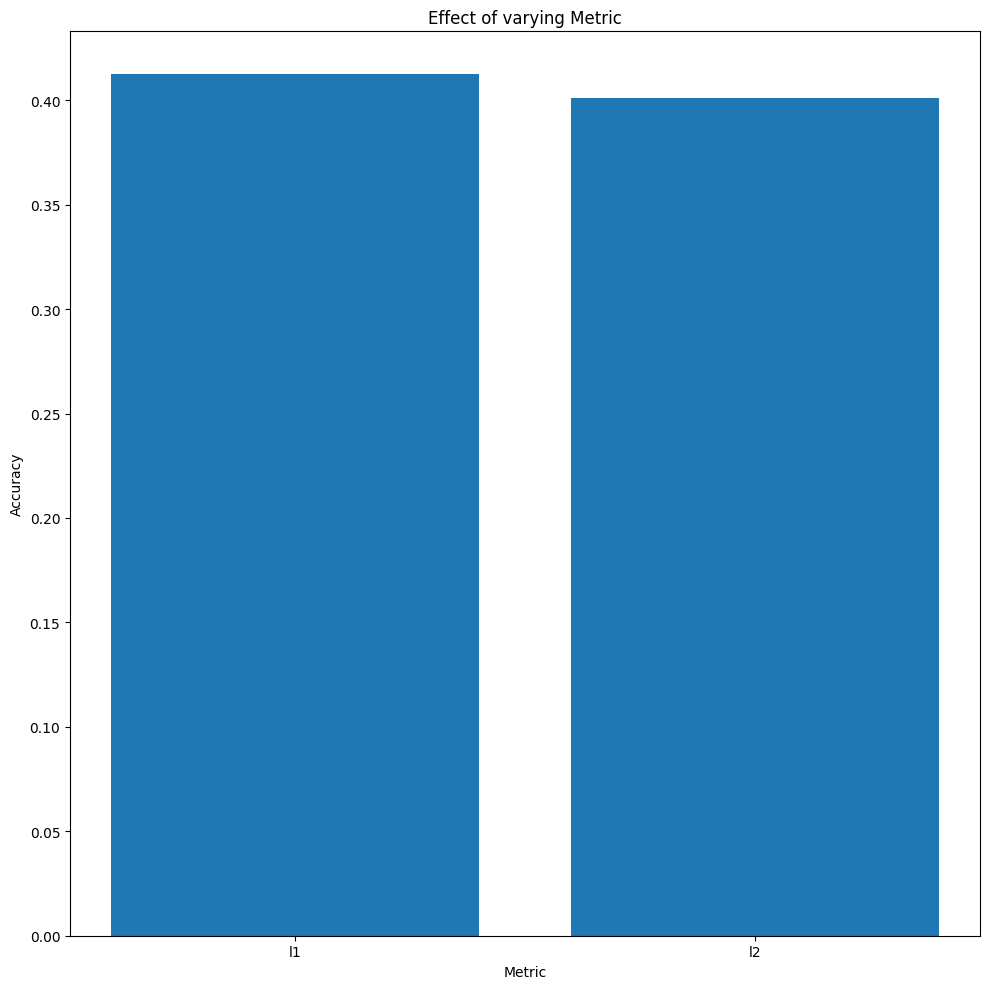

In [49]:
#Now to plot how the hyperparams change the model performance (on average)

#First to get lists of what params were used at each run
cv_n_neighbors = GS.cv_results_['param_n_neighbors']
cv_metric = GS.cv_results_['param_metric']

#And the score obtained at that run
performances = GS.cv_results_['mean_test_score']

file_path = "graphs/KNN/"

#Now to loop thru, for every candidate find which runs it was a part of, and take the average of those performances
for hyperparam_list, exponents, cv_results, name in [(hp_list_n_neighbors, hp_list_n_neighbors_exponents, cv_n_neighbors, "Number of Neighbors"),
                                                    (hp_list_metric, None, cv_metric, "Metric"),]:
    avgs = []
    for candidate in hyperparam_list:
        indexes = np.where(cv_results == candidate)[0]
        hyperparam_performances = [performances[index] for index in indexes]
        avg = sum(hyperparam_performances)/len(hyperparam_performances)
        avgs.append(avg)

    if exponents != None:
        plt.figure(figsize=(10,10))
        plt.plot(exponents, avgs)
        plt.title("Effect of varying " + name)
        plt.xlabel("$log_2$(" + name + ")")
        plt.ylabel("Negative Loss")
        plt.xticks(exponents)
        plt.grid(True)
        plt.tight_layout()
    else: #categorical hyperparam
        plt.figure(figsize=(10,10))
        plt.bar(hyperparam_list, avgs)
        plt.title("Effect of varying " + name)
        plt.xlabel(name)
        plt.ylabel("Accuracy")
        plt.tight_layout()
    plt.savefig(file_path + name)

print("Best hyperparams overall:")
print(GS.best_params_)

In [21]:
#Model 5 - Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Training
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)

#Evaluation
y_pred_GNB = GNB_model.predict(X_test)
acc_GNB = evaluate_classifications(y_pred_GNB, y_test)
print("Gaussian Naive Bayes accuracy for classification: {0:.3f}%".format(acc_GNB))

Gaussian Naive Bayes accuracy for classification: 97.615%


In [22]:
#Model 6 - Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

#Training
RFC_model = RandomForestClassifier(random_state=0)
RFC_model.fit(X_train, y_train)

#Evaluation
y_pred_RFC = RFC_model.predict(X_test)
acc_RFC = evaluate_classifications(y_pred_RFC, y_test)
print("Random Forest's accuracy for classification: {0:.3f}%".format(acc_RFC))

Random Forest's accuracy for classification: 99.538%
